In [16]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [17]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Theft/CDI_Based/Intensity/CSV/Laplacian_No_Filter.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

0        1        2        3        4        5        6        7  \
0  3366000  2755020  2829990  3029655  2665260  2501550  2368950  2014245   
1  3734730  3889515  3425160  3070455  3432300  3095700  2603550  2936835   
2  5408550  3895890  3554190  4857750  4553790  2768790  2930205  4293435   
3  2826165  1355070   986595  1118940  2388075  3125280  2862120  2587230   
4  2869005  1819425   776985   901935  2347530  2623185  2521185  2110380   

         8        9  ...       19       20       21       22       23  \
0  2236095  2193255  ...  1522350  1613130  1410405  1977780  3449895   
1  3349170  3108195  ...  3253035  3924705  3319845  3701580  3317295   
2  3209940  3612330  ...  1567230  2275365  3617175  3869115  5447565   
3  2222325  1919130  ...  1489200  1496595  1511385  2094570  2360280   
4  1627665  1379040  ...  1108485  1072530  1251285  2336310  2557650   

        24       25       26       27  Class  
0  1872465  1432590  1382355  1500420      1  
1  2895780  3369825  2334525  2401080      1  
2  3243345  1443300  1833705  3740085      1  
3  1448400  1611345  1974210  1839825      1  
4  1523625  1317585  1125060  1027395      1  

[5 rows x 29 columns]

In [18]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=0)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)

std =StandardScaler()
X_train=std.fit_transform(X_train)
x_test=std.transform(x_test)


In [19]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.8092105263157895
              precision    recall  f1-score   support

          -1       0.87      0.90      0.88       123
           1       0.50      0.41      0.45        29

    accuracy                           0.81       152
   macro avg       0.68      0.66      0.67       152
weighted avg       0.80      0.81      0.80       152



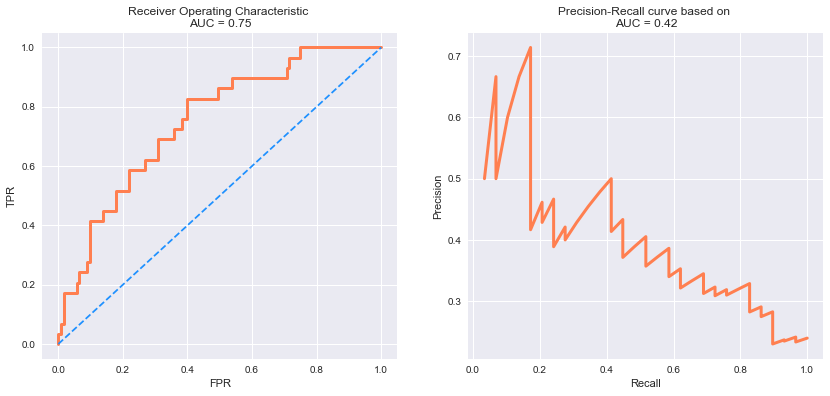

In [20]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()